In [1]:
# Import base librares
import pandas as pd
import numpy as np
import os
from pathlib import Path
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def kaggle_submit(file, comment):
#     print(file, comment)
    !echo File name={file}
    !ls -l {file}
    !echo kaggle competitions submit -c competitive-data-science-final-project -f {file} -m '"{comment}"' 
    !kaggle competitions submit -c competitive-data-science-final-project -f {file} -m "{comment}"

def kaggle_get_submissions():
    !kaggle competitions submissions competitive-data-science-final-project

In [3]:
# Download data files
data_folder = Path('../readonly/final_project_data')

transactions    = pd.read_csv(data_folder/'sales_train.csv.gz')
items           = pd.read_csv(data_folder/'items.csv')
item_categories = pd.read_csv(data_folder/'item_categories.csv')
shops           = pd.read_csv(data_folder/'shops.csv')

test = pd.read_csv(data_folder/'test.csv.gz', index_col='ID')

In [4]:
# Base data observation
print('Transactions shape:', transactions.shape)
transactions.head()

Transactions shape: (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
print('items shape:', items.shape)
items

items shape: (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [6]:
print('item_categories shape:', item_categories.shape)
item_categories.head()

item_categories shape: (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
print('shops shape:', shops.shape)
shops.head()

shops shape: (60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
print(test.info())
print('Test date shape:', shops.shape)
test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   shop_id  214200 non-null  int64
 1   item_id  214200 non-null  int64
dtypes: int64(2)
memory usage: 4.9 MB
None
Test date shape: (60, 2)


,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757


In [9]:
print('Number of shops in test set:', test['shop_id'].unique().shape[0])
print('Number of unique items in test set:', test['item_id'].unique().shape[0])
print('Total number of rows in test set:', test.shape[0])
print('Product of shops and items:', 
      test['shop_id'].unique().shape[0] * test['item_id'].unique().shape[0])

Number of shops in test set: 42
Number of unique items in test set: 5100
Total number of rows in test set: 214200
Product of shops and items: 214200


In [10]:
# Merge into one table
transactions.date = pd.to_datetime(transactions.date, yearfirst=True)
data = transactions.merge(items).merge(item_categories).merge(shops)
# Calculate income from transaction
# data['income'] = data['item_price'] * data['item_cnt_day']
data['date_block_num'] = data['date_block_num'].astype(np.int8)
data['shop_id'] = data['shop_id'].astype(np.int8)
data['item_id'] = data['item_id'].astype(np.int16)
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-02-01,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-04-26,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,2013-06-26,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,2013-07-20,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,2013-09-14,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,13093,250.0,1.0,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935845,2015-09-21,32,55,13091,1000.0,1.0,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935846,2015-09-16,32,55,13094,2500.0,1.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935847,2015-09-22,32,55,13094,2500.0,2.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int8          
 2   shop_id             int8          
 3   item_id             int16         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   item_category_name  object        
 9   shop_name           object        
dtypes: datetime64[ns](1), float64(2), int16(1), int64(1), int8(2), object(3)
memory usage: 190.4+ MB


In [12]:
%%time
# Clip data to boundaries
# data[data['item_cnt_day']<0] = 0
# data[data['item_cnt_day']>20] = 20
data['item_cnt_day'].clip(lower=0, upper=20, inplace=True)

CPU times: user 36.6 ms, sys: 7.6 ms, total: 44.2 ms
Wall time: 26.1 ms


In [13]:
# Preparing test data to combine with train data
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)

test

,shop_id,item_id,date_block_num
ID,,,
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34


,item_cnt_month
count,31531.000000
mean,1.100836
std,0.619234
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,20.000000


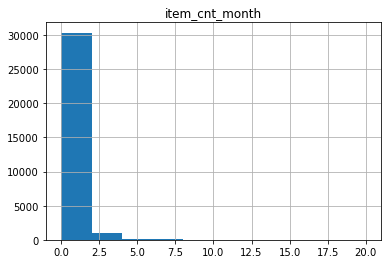

In [14]:
d_sum_mean = data[data['date_block_num']==33
                 ].groupby(['shop_id', 'item_id'])['item_cnt_day'].mean().to_frame()
d_sum_mean.columns = ['item_cnt_month']
# d_sum[d_sum<0]=0
d_sum_mean.hist()
d_sum_mean.describe()

In [15]:
# Preparation submission
# d_sum_mean.reset_index(inplace=True)
# d_sum_mean.columns=['shop_id', 'item_id', 'item_cnt_month']

# submission = test.merge(d_sum_mean, how='left', sort=False)
submission = test.reset_index().set_index(
    ['shop_id', 'item_id', 'ID']).join(d_sum_mean, how='left', sort=False)
submission = submission.reset_index().set_index('ID')
submission.fillna(0, inplace=True)
submission

,shop_id,item_id,date_block_num,item_cnt_month
ID,,,,
0,5,5037,34,0.0
1,5,5320,34,0.0
2,5,5233,34,1.0
3,5,5232,34,0.0
4,5,5268,34,0.0
...,...,...,...,...
214195,45,18454,34,1.0
214196,45,16188,34,0.0
214197,45,15757,34,0.0


In [16]:
# Create submission file and send it to Kaggle
submission.reset_index().drop(
    columns=['shop_id', 'item_id', 'date_block_num']).to_csv('previous_value_benchmark.csv', index=True)
# kaggle_submit("previous_value_benchmark.csv", "Calc previous_value_benchmark possibly as a mean value")

In [17]:
# Get score
kaggle_get_submissions()

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 7, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.8/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /home/jovyan/.kaggle. Or use the environment method.


Seems that needs by course

In [18]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in transactions['date_block_num'].unique():
    cur_shops = transactions[transactions['date_block_num']==block_num
                            ]['shop_id'].unique()
    cur_items = transactions[transactions['date_block_num']==block_num
                            ]['item_id'].unique()
    grid.append(np.array(
        list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
grid[:2]

grid_vstack = np.vstack(grid)
# print('grid shape:', grid_vstack.shape)

#turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)
# print('grid.head():\n', grid.head(), sep='')

#get aggregated values for (shop_id, item_id, month)
# gb = sales.groupby(index_cols,as_index=False).agg({'item_cnt_day':{'target':'sum'}})
gb = transactions.groupby(index_cols,as_index=False).agg({'item_cnt_day':'sum'})
gb.rename(columns={'item_cnt_day':'item_cnt_month'}, inplace=True)

#join aggregated data to the grid
all_data = pd.merge(grid, gb, how='left', on=index_cols).fillna(0)

#sort the data
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

# all_data['date_block_num'] = all_data['date_block_num'].astype(np.int8)
# all_data['shop_id'] = all_data['shop_id'].astype(np.int8)
# all_data['item_id'] = all_data['item_id'].astype(np.int16)

all_data

,shop_id,item_id,date_block_num,item_cnt_month
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0
...,...,...,...,...
10768834,59,22162,33,0.0
10769024,59,22163,33,0.0
10769690,59,22164,33,0.0
10771216,59,22166,33,0.0


In [19]:
mdata = pd.concat([all_data, test], keys=['shop_id', 'item_id'], ignore_index=True, axis=0)
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11128050 entries, 0 to 11128049
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   shop_id         int32  
 1   item_id         int32  
 2   date_block_num  int32  
 3   item_cnt_month  float64
dtypes: float64(1), int32(3)
memory usage: 212.3 MB


In [22]:
mdata = mdata.merge(items).merge(shops)

In [23]:
mdata['shop_id'] = mdata['shop_id'].astype('int8')
mdata['item_id'] = mdata['item_id'].astype('int16')
mdata['date_block_num'] = mdata['date_block_num'].astype('int8')
mdata['item_cnt_month'] = mdata['item_cnt_month'].astype('float16')
mdata['item_category_id'] = mdata['item_category_id'].astype('int8')
mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11128050 entries, 0 to 11128049
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   shop_id           int8   
 1   item_id           int16  
 2   date_block_num    int8   
 3   item_cnt_month    float16
 4   item_name         object 
 5   item_category_id  int8   
 6   shop_name         object 
dtypes: float16(1), int16(1), int8(3), object(2)
memory usage: 329.0+ MB


In [ ]:
# pd.concat([mdata, data['shop_id', 'item_id', 'item_category_id', 'item_category_name', 'item_name', 'shop_name']],
#            keys=['shop_id', 'item_id'], ignore_index=True)

In [ ]:
# data['shop_id', 'item_id', 'item_category_id', 'item_category_name', 'item_name', 'shop_name']

In [24]:
%%time
# Mean encoded features
column = mdata.groupby(['date_block_num']).agg('item_cnt_month').mean().astype('float16').to_frame().rename(
    columns={'item_cnt_month':'item_cnt_month_date_mean'}).reset_index()

mdata = pd.merge(mdata, column, on=['date_block_num'], how='left')
mdata

CPU times: user 1.59 s, sys: 345 ms, total: 1.93 s
Wall time: 1.93 s


,shop_id,item_id,date_block_num,item_cnt_month,item_name,item_category_id,shop_name,item_cnt_month_date_mean
0,0,19,0,0.0,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,40,"!Якутск Орджоникидзе, 56 фран",0.360107
1,0,27,0,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.360107
2,0,27,1,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.340820
3,0,28,0,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.360107
4,0,28,1,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.340820
...,...,...,...,...,...,...,...,...
11128045,36,15033,34,NaN,"Метод.материалы ""1С:Бухгалтерия государственно...",49,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN
11128046,36,7572,34,NaN,WARHAMMER 40000 MINIATURES: Chaos Cultists (ма...,64,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN
11128047,36,9030,34,NaN,БРАТЬЯ КАРАМАЗОВЫ (Регион),40,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN
11128048,36,1867,34,NaN,"Battlefield 4. Premium Service [PC, Цифровая в...",31,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN


In [25]:
%%time
column = mdata.groupby(['date_block_num', 'shop_id']).agg('item_cnt_month').mean().astype('float16').to_frame().rename(
    columns={'item_cnt_month':'item_cnt_month_date_shop_mean'}).reset_index()

mdata = pd.merge(mdata, column, on=['date_block_num', 'shop_id'], how='left')
mdata

CPU times: user 1.85 s, sys: 417 ms, total: 2.26 s
Wall time: 2.26 s


,shop_id,item_id,date_block_num,item_cnt_month,item_name,item_category_id,shop_name,item_cnt_month_date_mean,item_cnt_month_date_shop_mean
0,0,19,0,0.0,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,40,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875
1,0,27,0,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875
2,0,27,1,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.340820,0.7500
3,0,28,0,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875
4,0,28,1,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.340820,0.7500
...,...,...,...,...,...,...,...,...,...
11128045,36,15033,34,NaN,"Метод.материалы ""1С:Бухгалтерия государственно...",49,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN
11128046,36,7572,34,NaN,WARHAMMER 40000 MINIATURES: Chaos Cultists (ма...,64,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN
11128047,36,9030,34,NaN,БРАТЬЯ КАРАМАЗОВЫ (Регион),40,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN
11128048,36,1867,34,NaN,"Battlefield 4. Premium Service [PC, Цифровая в...",31,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN


In [26]:
%%time
column = mdata.groupby(['date_block_num', 'item_id']).agg('item_cnt_month').mean().astype('float16').to_frame().rename(
    columns={'item_cnt_month':'item_cnt_month_date_item_mean'}).reset_index()

mdata = pd.merge(mdata, column, on=['date_block_num', 'item_id'], how='left')
mdata

CPU times: user 2.77 s, sys: 352 ms, total: 3.12 s
Wall time: 3.12 s


,shop_id,item_id,date_block_num,item_cnt_month,item_name,item_category_id,shop_name,item_cnt_month_date_mean,item_cnt_month_date_shop_mean,item_cnt_month_date_item_mean
0,0,19,0,0.0,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,40,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875,0.022217
1,0,27,0,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875,0.155518
2,0,27,1,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.340820,0.7500,0.065247
3,0,28,0,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875,0.177734
4,0,28,1,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.340820,0.7500,0.173950
...,...,...,...,...,...,...,...,...,...,...
11128045,36,15033,34,NaN,"Метод.материалы ""1С:Бухгалтерия государственно...",49,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN
11128046,36,7572,34,NaN,WARHAMMER 40000 MINIATURES: Chaos Cultists (ма...,64,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN
11128047,36,9030,34,NaN,БРАТЬЯ КАРАМАЗОВЫ (Регион),40,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN
11128048,36,1867,34,NaN,"Battlefield 4. Premium Service [PC, Цифровая в...",31,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN


In [27]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [28]:
%%time
# Making lag features
mdata = mdata.merge(lag_feature(mdata, [1, 2, 3, 4], 'item_cnt_month'))
mdata

CPU times: user 4min 7s, sys: 7.02 s, total: 4min 14s
Wall time: 4min 14s


,shop_id,item_id,date_block_num,item_cnt_month,item_name,item_category_id,shop_name,item_cnt_month_date_mean,item_cnt_month_date_shop_mean,item_cnt_month_date_item_mean,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_4
0,0,19,0,0.0,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,40,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875,0.022217,NaN,NaN,NaN,NaN
1,0,27,0,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875,0.155518,NaN,NaN,NaN,NaN
2,0,27,1,0.0,"007 Legends [PS3, русская версия]",19,"!Якутск Орджоникидзе, 56 фран",0.340820,0.7500,0.065247,0.0,NaN,NaN,NaN
3,0,28,0,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.360107,0.6875,0.177734,NaN,NaN,NaN,NaN
4,0,28,1,0.0,"007 Legends [PС, Jewel, русская версия]",30,"!Якутск Орджоникидзе, 56 фран",0.340820,0.7500,0.173950,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11128045,36,15033,34,NaN,"Метод.материалы ""1С:Бухгалтерия государственно...",49,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
11128046,36,7572,34,NaN,WARHAMMER 40000 MINIATURES: Chaos Cultists (ма...,64,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
11128047,36,9030,34,NaN,БРАТЬЯ КАРАМАЗОВЫ (Регион),40,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
11128048,36,1867,34,NaN,"Battlefield 4. Premium Service [PC, Цифровая в...",31,"Новосибирск ТРЦ ""Галерея Новосибирск""",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
%%time
# Making lag features
mdata = mdata.merge(lag_feature(mdata, [1, 2, 3, 4], 'item_cnt_month_date_mean'))
mdata

In [ ]:
mdata.info()

In [ ]:
%%time
# Making lag features
mdata = mdata.merge(lag_feature(mdata, [1, 2, 3, 4], 'item_cnt_month_date_item_mean'))
mdata

In [ ]:
# splitting data to train, test and validation parts
x_train = mdata[mdata.date_block_num < 33].drop(['item_cnt_month'], axis=1)
y_train = mdata[mdata.date_block_num < 33]['item_cnt_month']
x_valid = mdata[mdata.date_block_num == 33].drop(['item_cnt_month'], axis=1)
y_valid = mdata[mdata.date_block_num == 33]['item_cnt_month']
x_test = mdata[mdata.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [ ]:
# import catboost as cb
from catboost import CatBoostRegressor, Pool
cat_features = ['shop_id', 'item_id', 'date_block_num', item_category_id]
text_features = ['item_name', 'shop_name']
train_pool = Pool(x_train, y_train, cat_features=cat_features, text_features=text_features)
valid_pool = Pool(x_valid, y_valid, cat_features=cat_features, text_features=text_features)
test_pool = Pool(x_test, cat_features=cat_features, text_features=text_features)

In [ ]:
model = CatBoostRegressor()
model.fit(train_pool, eval_set=valid_pool, verbose=20, plot=True)